
## <b> <center style="background-color:DodgerBlue;"> Flipkart Data Scrap alogn with Price Prediction </center> </b>

In [3]:

# -*- coding: utf-8 -*-
# Indentation: Jupyter Notebook

__version__ = 1.0
__author__ = "Sourav Raj"
__author_email__ = "souravraj.iitbbs@gmail.com"

### 1. Business Understanding

1. What is the problem that we are trying to solve?

We are trying to solve a Classification Problem. Based on the Data Scrapped from a popular e-Commerce Site, we are trying to create a model to ascertain a price category of a newly introduced TV based on the features it provides.

2. What data do we need to answer the above problem?

The data required is the present listed TVs with their features/specification and pricing. We have Categorized TV based on the pricing say • <20,000; • 20,000 to 40,000; • 40,000 to 60,000;  >60,0000.

3. What are the different sources of data?

There are may source available for this as most of eCommerce site will contain these info. for time being data has been scrapped from an eCommerce site "flipkart.com".

4. What kind of analytics task are we performing?

We are doing a Predictive Analytics (Multi label classification) to predict the price band of TV given its features/specification.

In [263]:
# Importing library
from bs4 import BeautifulSoup
import requests
import csv
import time
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import pandas as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve, confusion_matrix, f1_score
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from IPython.display import Image

# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves which should be a website which has the required data in it. You have to write Python crawler code to scrape data from the respective website rather than downloading ready-made dataset as such from sources like Kaggle etc. 

(Data downloaded from website like Kaggle will be awarded negative marks.)

## 2.1 Code for scraping data from website



For data scrapping, we are using flipkart & collecting all the information related to specification of Television search. 

As flipkart provide the search result page wise we are iterating through different pages from 1 to 45 & collecting all the info in appropriate format.

We have also inserted the random sleep time in the code so that flipkart don't get suspicious about data scrapping & block out IP address.

While scrapping, we noticed that some the data is not related to television at all like dish tv, tv cable wire etc. so we put a filter in price so that only right data is inserted.

As flipkart provides search result along with some discription in the seach page itself (see below Image), we can scrap those data & store it. 

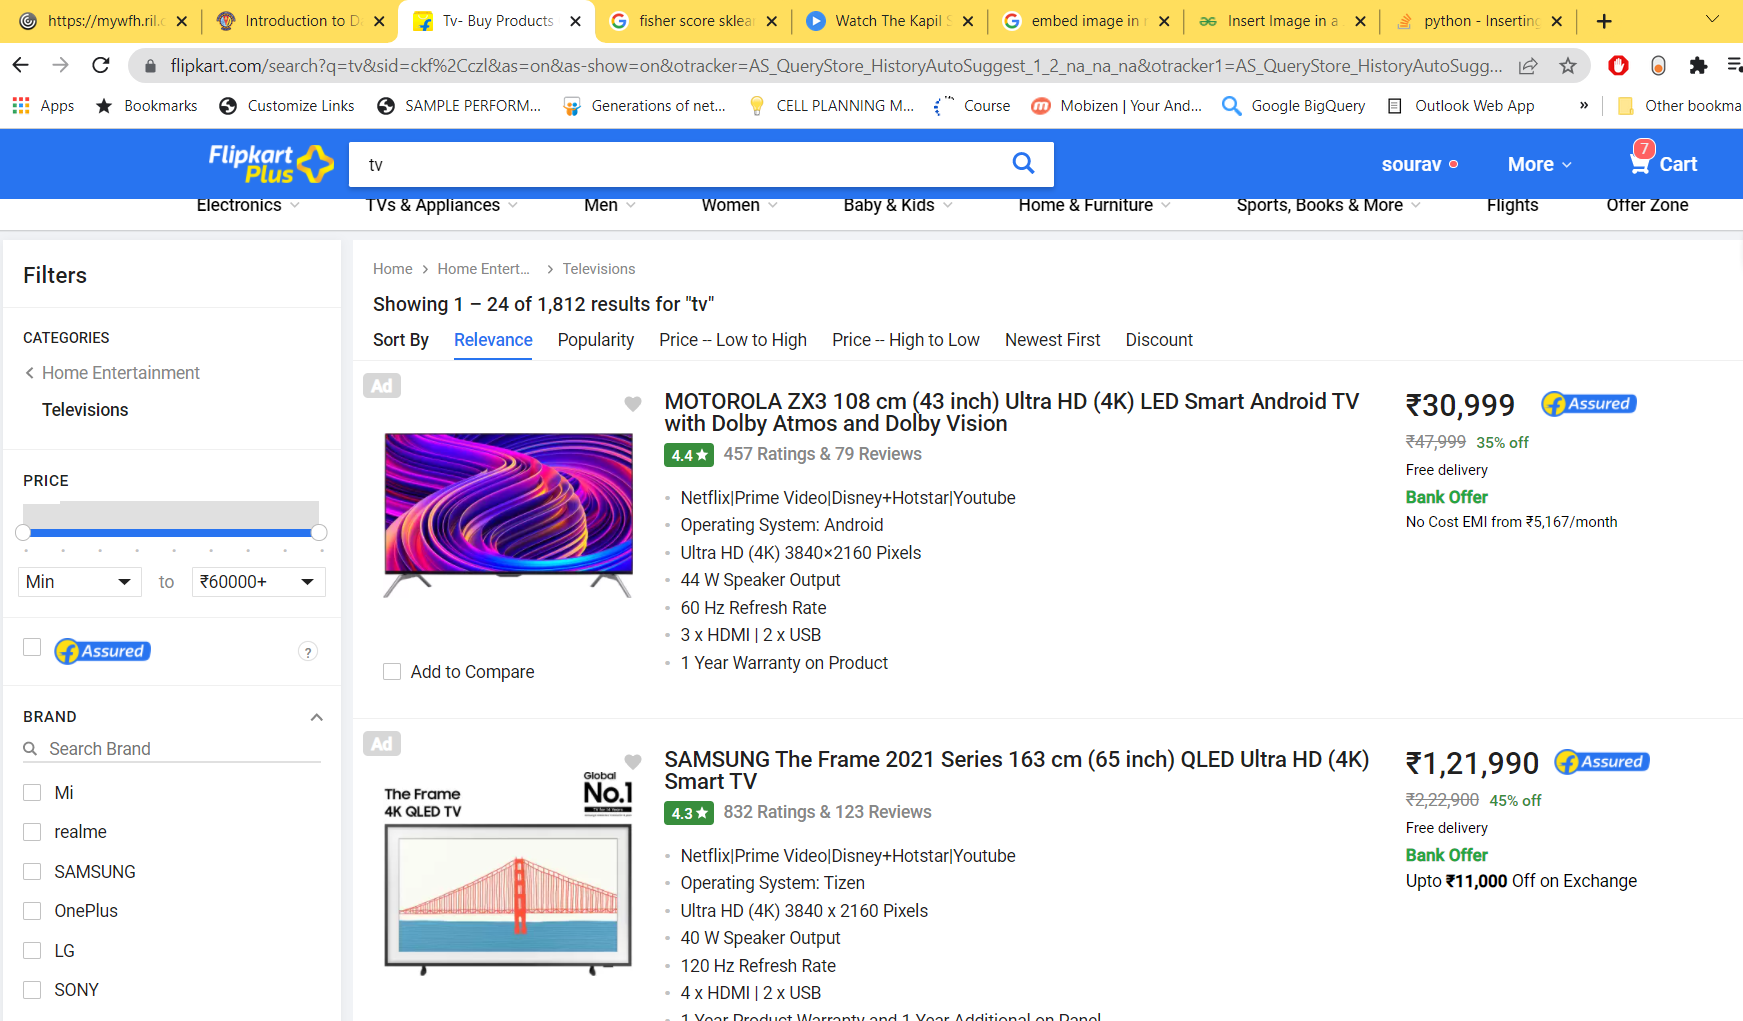

In [220]:
Image(filename='flipkartSearch.png',width=800, height=400)

In [222]:

def specification_parser(article):
    '''
     function to parse the specifications & return tuple of values for each specification.
     
    '''
    NetflixSupport, HotstarSupport, YoutubeSupport, PrimeVideoSupport, OperatingSystem, ScreenType, resolution, \
                 Pixels, Speaker, RefreshRate, HDMI, USB, Warranty=[None]*13
    specifications=article.find('div', class_='fMghEO')
    for spec in specifications.findAll('li', class_='rgWa7D'):

        spec=spec.text.lower()
#         print(spec)
        if 'youtube' in spec:YoutubeSupport=1
        if 'netflix' in spec: NetflixSupport=1
        if 'hotstar' in spec: HotstarSupport=1
        if 'prime' in spec: PrimeVideoSupport=1
        try:
       
            if 'operating' in spec:
                OperatingSystem=spec.split(':')[1].strip()
            elif 'hdmi' in spec:
                HDMI, USB=spec.split('|')
                HDMI=HDMI.strip()[:1]
                USB=USB.strip()[:1]
            elif 'ultra hd' in spec:
                ScreenType='Ultra HD'
                resolution, Pixels=spec.split(')')
                resolution=resolution.split('(')[1].strip()
                Pixels=Pixels.replace('pixels', '').strip()
            elif 'full hd' in spec:
                ScreenType='Full HD'
                Pixels=spec.split('hd')[1].split('pixels')[0].strip()
            elif 'hd' in spec:
                ScreenType='HD'
                Pixels=spec.split('ready')[1].split('pixels')[0].strip()
            elif 'speaker' in spec:
                Speaker=spec.split('speaker')[0].replace(' ', '').split('w')[0].strip()
            elif 'refresh' in spec:
                RefreshRate=spec.split('refresh')[0].strip().split('hz')[0].strip()
            elif 'year' in spec:
                Warranty=spec.strip()[:1]
        except Exception as e:
            pass
    parseResult=(NetflixSupport, HotstarSupport, YoutubeSupport, PrimeVideoSupport, OperatingSystem, ScreenType, resolution, \
                 Pixels, Speaker, RefreshRate, HDMI, USB, Warranty)

    return parseResult


In [1]:
##---------Type the code below this line------------------##

data_specification=[]
for pageNumber in range(1, 45):
    url=f'https://www.flipkart.com/search?q=tv&sid=ckf%2Cczl&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_2_2_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_2_2_na_na_ps&as-pos=2&as-type=RECENT&suggestionId=tv%7CTelevisions&requestId=07e29eff-f702-4480-bca1-ee9bb0e46ea1&as-searchtext=tv&page={pageNumber}'
    source = requests.get(url).text
    soup=BeautifulSoup(source, 'lxml')
    print(f'Flipkart Page num ={pageNumber} is started processing for given URL')
    for article in soup.findAll('div', class_='_3pLy-c row'):
    #     print(article)
        DeviceName, Brand, ScreenSize, NetflixSupport, HotstarSupport, YoutubeSupport, PrimeVideoSupport, OperatingSystem, \
            ScreenType, resolution, Pixels, Speaker, RefreshRate, HDMI, USB, Warranty, tvPrice = ['']*17
        try:
            DeviceName=article.find('div', class_='_4rR01T').text
            Brand=DeviceName.split(' ')[0]
            ScreenSize=DeviceName.split('inch')[0].split('(')[1].strip()
        except Exception as e:
            pass
        try:
            NetflixSupport, HotstarSupport, YoutubeSupport, PrimeVideoSupport, OperatingSystem, ScreenType, resolution, \
                 Pixels, Speaker, RefreshRate, HDMI, USB, Warranty=specification_parser(article)
        except Exception as e:
            pass
        try:
            tvPrice=int(article.find('div', class_='_30jeq3 _1_WHN1').text[1:].replace(',', ''))
        except Exception as e:
            pass
    #                 print(e)
        if tvPrice>6000:
            data_specification.append([DeviceName, Brand, ScreenSize, NetflixSupport, HotstarSupport, YoutubeSupport, PrimeVideoSupport, OperatingSystem, \
                    ScreenType, resolution, Pixels, Speaker, RefreshRate, HDMI, USB, Warranty, tvPrice])
    time.sleep(random.randint(10, 30))



Flipkart Page num =1 is started processing for given URL
Flipkart Page num =2 is started processing for given URL
Flipkart Page num =3 is started processing for given URL
Flipkart Page num =4 is started processing for given URL
Flipkart Page num =5 is started processing for given URL
Flipkart Page num =6 is started processing for given URL
Flipkart Page num =7 is started processing for given URL
Flipkart Page num =8 is started processing for given URL
Flipkart Page num =9 is started processing for given URL
Flipkart Page num =10 is started processing for given URL
Flipkart Page num =11 is started processing for given URL
Flipkart Page num =12 is started processing for given URL
Flipkart Page num =13 is started processing for given URL
Flipkart Page num =14 is started processing for given URL
Flipkart Page num =15 is started processing for given URL
Flipkart Page num =16 is started processing for given URL
Flipkart Page num =17 is started processing for given URL
Flipkart Page num =18 i

## 2.2 Code for converting the above scraped data into a dataframe

In [17]:

##---------Type the code below this line------------------##
columns=['deviceName', 'brand', 'screenSize', 'netflixSupport', 'hotstarSupport', 'youtubeSupport', 'primeVideoSupport', 'operatingSystem' \
                     , 'screenType', 'resolution', 'pixels', 'speaker', 'refreshRate(Hz)', 'hdmi', 'usb', 'warranty', 'price']
data = pd.DataFrame(data_specification, columns = columns)

## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [18]:
##---------Type the code below this line------------------##
data.head()

,deviceName,brand,screenSize,netflixSupport,hotstarSupport,youtubeSupport,primeVideoSupport,operatingSystem,screenType,resolution,pixels,speaker,refreshRate(Hz),hdmi,usb,warranty,price
0,Adsun 80 cm (32 inch) HD Ready LED Smart TV,Adsun,32,1.0,1.0,1.0,NaN,android based,HD,None,1366 x 768,20,60,2,2,3,10490
1,SONY BRAVIA 80 cm (32 inch) HD Ready LED Smart TV,SONY,32,1.0,NaN,1.0,1.0,linux based,HD,None,1366 x 768,20,50,2,2,1,24999
2,Mi 4A PRO 80 cm (32 inch) HD Ready LED Smart A...,Mi,32,1.0,1.0,1.0,1.0,android,HD,None,1366 x 768,20,60,3,2,1,15999
3,OnePlus Y Series 80 cm (32 inch) HD Ready LED ...,OnePlus,32,1.0,1.0,1.0,1.0,android,HD,None,1366 x 768,20,60,2,2,1,15999
4,Mi 4A Horizon Edition 80 cm (32 inch) HD Ready...,Mi,32,1.0,1.0,1.0,1.0,android,HD,None,1366 x 768,20,60,3,2,1,16499


In [19]:
data.tail()

,deviceName,brand,screenSize,netflixSupport,hotstarSupport,youtubeSupport,primeVideoSupport,operatingSystem,screenType,resolution,pixels,speaker,refreshRate(Hz),hdmi,usb,warranty,price
973,SAMSUNG Crystal 4K 108 cm (43 inch) Ultra HD (...,SAMSUNG,43,1.0,1.0,1.0,NaN,tizen,Ultra HD,4k,3840 x 2160,20,60,3,1,1,36990
974,Samsung 32 Inches HD LCD LA32D403E2 Television,Samsung,,NaN,NaN,NaN,NaN,None,HD,None,1366 x 768,10,None,None,None,1,27900
975,TCL 165 cm (65 inch) Ultra HD (4K) LED Smart A...,TCL,65,1.0,1.0,1.0,NaN,android,Ultra HD,4k,3840 x 2160,16,60,3,2,1,71999
976,SAMSUNG 100 cm (40 inch) Full HD LED TV,SAMSUNG,40,NaN,NaN,NaN,NaN,None,Full HD,None,1920 x 1080,20,60,2,1,1,22990
977,SONY W820 80 cm (32 inch) HD Ready LED Smart A...,SONY,32,1.0,1.0,1.0,1.0,android,HD,None,1366 x 768,20,60,3,2,1,28999


## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [20]:
##---------Type the code below this line------------------##
print(f'Column Heading:')
data.columns

Index(['deviceName', 'brand', 'screenSize', 'netflixSupport', 'hotstarSupport',
       'youtubeSupport', 'primeVideoSupport', 'operatingSystem', 'screenType',
       'resolution', 'pixels', 'speaker', 'refreshRate(Hz)', 'hdmi', 'usb',
       'warranty', 'price'],
      dtype='object')

Assigning appropriate dataType to Numerical column. Also replace NaN value to ''.

In [22]:
data.replace('NaN', '', inplace=True)
for column in ['screenSize', 'hdmi', 'speaker', 'refreshRate(Hz)', 'usb', 'warranty', 'price']:
    data[column]=pd.to_numeric(data[column].apply(lambda x: str(x).replace(',', '')), errors='coerce')


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   deviceName         978 non-null    object 
 1   brand              978 non-null    object 
 2   screenSize         952 non-null    float64
 3   netflixSupport     721 non-null    float64
 4   hotstarSupport     686 non-null    float64
 5   youtubeSupport     754 non-null    float64
 6   primeVideoSupport  304 non-null    float64
 7   operatingSystem    792 non-null    object 
 8   screenType         976 non-null    object 
 9   resolution         504 non-null    object 
 10  pixels             974 non-null    object 
 11  speaker            957 non-null    float64
 12  refreshRate(Hz)    937 non-null    float64
 13  hdmi               962 non-null    float64
 14  usb                962 non-null    float64
 15  warranty           963 non-null    float64
 16  price              978 non

Column Description:
1. deviceName: Name of television given in website.
2. brand: brand extracted from the device Name while scrapping
3. screenSize: size of the Television screen extracted from device name while scrapping
4. netflixSupport: boolean value- 1 if netflix is supported else 0
5. hotstarSupport: boolean value- 1 if hotstart is supported else 0
6. youtubeSupport: boolean value- 1 if youtube is supported else 0
7. primeVideoSupport: boolean value- 1 if prime video is supported else 0
8. operatingSystem: operating system of television if it is given in website
9. screenType: television screen type (HD, FULL HD, Ultra HD)
10. resolution: television resoultion (4k, 8K) if it applicable else null.
11. pixels: television resolution in terms of pixels (eg. 1980x1360).
12. speaker: speaker output in watt (8w, 16w)
13. refreshRate(Hz): refresh rate of television (60Hz, 120 Hz)
14. hdmi: number of HDMI port supported by television.
15. usb: number of USB port supported by television.
16. warranty: warranty of television in years.
17. price: cost of television.


In [24]:
data.describe()

,screenSize,netflixSupport,hotstarSupport,youtubeSupport,primeVideoSupport,speaker,refreshRate(Hz),hdmi,usb,warranty,price
count,952.000000,721.0,686.0,754.0,304.0,957.000000,937.000000,962.000000,962.000000,963.000000,978.000000
mean,45.695798,1.0,1.0,1.0,1.0,25.121212,70.404482,2.721414,1.765073,1.169263,55867.494888
std,12.453601,0.0,0.0,0.0,0.0,22.589338,39.012513,0.779110,0.568792,0.531160,61300.493230
min,15.000000,1.0,1.0,1.0,1.0,6.000000,5.000000,1.000000,1.000000,1.000000,6890.000000
25%,32.000000,1.0,1.0,1.0,1.0,20.000000,60.000000,2.000000,1.000000,1.000000,19800.000000
50%,43.000000,1.0,1.0,1.0,1.0,20.000000,60.000000,3.000000,2.000000,1.000000,36990.000000
75%,55.000000,1.0,1.0,1.0,1.0,24.000000,60.000000,3.000000,2.000000,1.000000,62900.000000
max,85.000000,1.0,1.0,1.0,1.0,600.000000,800.000000,4.000000,3.000000,3.000000,499990.000000


## 2.5 Write your observations from the above. 
1. Size of the dataset
(978, 17)
2. What type of data attributes are there?

 0.   deviceName         978 non-null    object 
 1.   brand              978 non-null    object 
 2.   screenSize         952 non-null    float64
 3.   netflixSupport     721 non-null    float64
 4.   hotstarSupport     686 non-null    float64
 5.   youtubeSupport     754 non-null    float64
 6.   primeVideoSupport  304 non-null    float64
 7.   operatingSystem    792 non-null    object 
 8.   screenType         976 non-null    object 
 9.   resolution         504 non-null    object 
 10.  pixels             974 non-null    object 
 11.  speaker            957 non-null    float64
 12.  refreshRate(Hz)    937 non-null    float64
 13.  hdmi               962 non-null    float64
 14.  usb                962 non-null    float64
 15.  warranty           963 non-null    float64
 16.  price              978 non-null    int64
3. Is there any null data that has to be cleaned?
all the columns except 'deviceName', 'Brand', 'price' doesn't have null values.

In [25]:
print(f'Size of the dataset: {data.shape}')
print(f'type fo data attributes:')
print(data.info())

Size of the dataset: (978, 17)
type fo data attributes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   deviceName         978 non-null    object 
 1   brand              978 non-null    object 
 2   screenSize         952 non-null    float64
 3   netflixSupport     721 non-null    float64
 4   hotstarSupport     686 non-null    float64
 5   youtubeSupport     754 non-null    float64
 6   primeVideoSupport  304 non-null    float64
 7   operatingSystem    792 non-null    object 
 8   screenType         976 non-null    object 
 9   resolution         504 non-null    object 
 10  pixels             974 non-null    object 
 11  speaker            957 non-null    float64
 12  refreshRate(Hz)    937 non-null    float64
 13  hdmi               962 non-null    float64
 14  usb                962 non-null    float64
 15  warranty          

Observation: all the columns except 'deviceName', 'Brand', 'price' doesn't have null values.

# 3. Data Preparation

## 3.1 Display how many unique values are present in each attribute


In [26]:
##---------Type the code below this line------------------##
for column in data.columns:
    print(column, ": " ,data[column].unique()) 
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>")

deviceName   ['Adsun 80 cm (32 inch) HD Ready LED Smart TV'
 'SONY BRAVIA 80 cm (32 inch) HD Ready LED Smart TV'
 'Mi 4A PRO 80 cm (32 inch) HD Ready LED Smart Android TV'
 'OnePlus Y Series 80 cm (32 inch) HD Ready LED Smart Android TV'
 'Mi 4A Horizon Edition 80 cm (32 inch) HD Ready LED Smart Android TV'
 'OnePlus Y Series 100 cm (40 inch) Full HD LED Smart Android TV'
 'Mi 5X 108 cm (43 inch) Ultra HD (4K) LED Smart Android TV with Dolby Atmos and Dolby Vision'
 'SAMSUNG 108 cm (43 inch) Full HD LED Smart TV'
 'Vu Premium 108 cm (43 inch) Ultra HD (4K) LED Smart Android TV'
 'OnePlus Y Series 108 cm (43 inch) Full HD LED Smart Android TV'
 'Mi 4A Horizon Edition 100 cm (40 inch) Full HD LED Smart Android TV'
 'SAMSUNG The Frame 2021 Series 163 cm (65 inch) QLED Ultra HD (4K) Smart TV'
 'Mi 4C 108 cm (43 inch) Full HD LED Smart Android TV'
 'realme 80 cm (32 inch) HD Ready LED Smart Android TV'
 'LG 80 cm (32 inch) HD Ready LED Smart TV'
 'SAMSUNG Crystal 4K 108 cm (43 inch) Ultra H

## 3.2 Check for the presence of duplicate data, identify the attributes with duplicate data, report the attributes. Mention the method adopted to remove duplicate data if present. Report the results again.

In [27]:
##---------Type the code below this line------------------##
duplicate = data[data.duplicated()]
print(f'there are {duplicate.shape[0]} duplicate records')

there are 248 duplicate records


In [28]:
for column in data.columns:
    duplicate = data[data.duplicated(column)]
    print(f'attribute "{column}" have {duplicate.shape}, duplicate data ') 
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>")

attribute "deviceName" have (356, 17), duplicate data 
>>>>>>>>>>>>>>>>>>>>>>>>>>>
attribute "brand" have (918, 17), duplicate data 
>>>>>>>>>>>>>>>>>>>>>>>>>>>
attribute "screenSize" have (953, 17), duplicate data 
>>>>>>>>>>>>>>>>>>>>>>>>>>>
attribute "netflixSupport" have (976, 17), duplicate data 
>>>>>>>>>>>>>>>>>>>>>>>>>>>
attribute "hotstarSupport" have (976, 17), duplicate data 
>>>>>>>>>>>>>>>>>>>>>>>>>>>
attribute "youtubeSupport" have (976, 17), duplicate data 
>>>>>>>>>>>>>>>>>>>>>>>>>>>
attribute "primeVideoSupport" have (976, 17), duplicate data 
>>>>>>>>>>>>>>>>>>>>>>>>>>>
attribute "operatingSystem" have (965, 17), duplicate data 
>>>>>>>>>>>>>>>>>>>>>>>>>>>
attribute "screenType" have (974, 17), duplicate data 
>>>>>>>>>>>>>>>>>>>>>>>>>>>
attribute "resolution" have (976, 17), duplicate data 
>>>>>>>>>>>>>>>>>>>>>>>>>>>
attribute "pixels" have (942, 17), duplicate data 
>>>>>>>>>>>>>>>>>>>>>>>>>>>
attribute "speaker" have (954, 17), duplicate data 
>>>>>>>>>>>>>>>>>>>>

Let's drop the duplicate record first using the inbuild pandas drop duplicate method. we are not dropping any records on the basis of attributes as we are not sure what combinations will be a good fit for model.

In [29]:
##---------.------------------##
data.drop_duplicates(inplace=True)
data.shape

(730, 17)

## 3.3 Show whether there are any missing values in each attribute. Report the same.


In [15]:
##---------Type the code below this line------------------##
missing_data=data.isnull().sum()
missing_data

deviceName             0
brand                  0
screenSize            26
netflixSupport       252
hotstarSupport       281
youtubeSupport       220
primeVideoSupport    489
operatingSystem      182
screenType             2
resolution           343
Pixels                 4
speaker               21
refreshRate(Hz)       41
hdmi                  16
usb                   16
warranty              15
price                  0
dtype: int64

## 3.4 Clean the missing data using any imputation technique, mention the method used and again report the change after cleaning the data.

In [31]:
##---------Type the code below this line------------------##

As 'netflixSupport', 'hotstarSupport', 'youtubeSupport', 'primeVideoSupport' attribute only have binary values & will be 1 if it is present in the specification. Let's replace all missing value with 0

In [ ]:
for column in ['netflixSupport', 'hotstarSupport', 'youtubeSupport', 'primeVideoSupport']:
    data[column].fillna(0, inplace=True)

As for some television 'operatingSystem' attribute is not given & we are not aware of so let's create as separate class 'Un' for missing data

Similarly for 'resolution' attribute, it is only applicable to Television which support 4k, 8K. For rest, let's create another category  'Un'

In [ ]:
for column in ['operatingSystem', 'resolution']:
    data[column].fillna('Un', inplace=True)


for attribute like 'screenSize', 'screenType', 'pixels', 'speaker', 'refreshRate(Hz)', 'hdmi', 'usb', 'warranty', very few rows are missing we are using mode to fill missing data

In [ ]:
for column in ['screenSize', 'screenType', 'pixels', 'speaker', 'refreshRate(Hz)', 'hdmi', 'usb', 'warranty']:
    data[column].fillna(data[column].mode()[0], inplace=True)


Missing value Analysis

In [33]:
missing_data=data.isnull().sum()
missing_data

deviceName           0
brand                0
screenSize           0
netflixSupport       0
hotstarSupport       0
youtubeSupport       0
primeVideoSupport    0
operatingSystem      0
screenType           0
resolution           0
pixels               0
speaker              0
refreshRate(Hz)      0
hdmi                 0
usb                  0
warranty             0
price                0
dtype: int64

Now no missing values.

## 3.5 Check if all the attributes are following the same format and are consistent. If not, report all such attributes and what inconsistencies are present.

In [34]:
##---------Type the code below this line------------------##
data.brand.unique()

array(['Adsun', 'SONY', 'Mi', 'OnePlus', 'SAMSUNG', 'Vu', 'realme', 'LG',
       'acer', 'Coocaa', 'MOTOROLA', 'Thomson', 'Nokia', 'KODAK',
       'iFFALCON', 'TCL', 'Sansui', 'Hisense', 'Croma', 'Infinix',
       'Blaupunkt', 'TOSHIBA', 'PHILIPS', 'Candes', 'T-Series',
       'Micromax', 'Panasonic', 'NOKIA', 'Lloyd', 'DETEL', 'MarQ',
       'Dyanora', 'Haier', 'Compaq', 'IMPEX', 'BPL', 'Intex', 'IGO',
       'RGL', 'LumX', 'Nacson', 'Skyworth', 'HUIDI', 'Onix', 'JVC',
       'Akai', 'VG', 'Oxygen', 'CloudWalker', 'Kevin', 'Sony', 'AISEN',
       'MURPHY', 'Samsung', 'ONIDA', '', 'Sharp', 'Hyundai', 'Noble',
       'Blackox'], dtype=object)

brand attribute is not consistent. 
1. some values are in lower case where as some are in upper case. 
2. Also one value is '' which should be taken care of.

In [37]:
data.screenSize.unique()

array([32. , 40. , 43. , 65. , 55. , 50. , 24. , 58. , 39. , 70. , 42. ,
       75. , 85. , 49. , 48. , 38. , 31.5, 38.5, 48.4, 19. , 28. , 22. ,
       15. , 23. ])

No inconsistency in screenSize attribute.

In [38]:
data.netflixSupport.unique()

array([1., 0.])

No inconsistency in netflixSupport attribute.

In [40]:
data.hotstarSupport.unique()

array([1., 0.])

No inconsistency in hotstarSupport attribute.

In [41]:
data.primeVideoSupport.unique()

array([0., 1.])

No inconsistency in primeVideoSupport attribute.

In [42]:
data.operatingSystem.unique()

array(['android based', 'linux based', 'android', 'tizen', 'webos',
       'linux', 'coolita', 'Un', 'vidaa', 'google tv', 'homeos',
       'firetv os 6', 'firetv os 7'], dtype=object)

operatingSystem attribute have different format of values ( android based vs android, linux based vs linux etc.)

In [45]:
data.screenType.unique()

array(['HD', 'Full HD', 'Ultra HD'], dtype=object)

No inconsistency in screenType attribute.

In [46]:
data.resolution.unique()

array(['Un', '4k'], dtype=object)

No inconsistency in resolution attribute.

In [48]:
data.pixels.unique()

array(['1366 x 768', '1920 x 1080', '3840 x 2160', '1366 x768',
       '3840×2160', '3840x2160', '3860 x 2160', '3840 � 2160', 'panel',
       '1366x768', '3840 × 2160', '4k', '?3840 x 2160',
       '3840 x 2160 - ultra hd', '3840 × 2161', '3,840 x 2,160', '720p',
       '1920 x 1080 - fhd', '1366?x?768', '1980 x 1080', '3840 x 2860',
       'ips led panel', '1366x 768', '1366x768p', '1,366 x 768',
       '1366*768', '3840*2160', '', '3840 * 2160', 'ultra hd', '1080 p',
       '1280 x 800', 'hd', '1280 x 768', '1366 x 1080'], dtype=object)

Pixels attribute have different formats of same value
1. '1366 x 768', '1366 x768', '1366*768'
2. '1920 x 1080' & '1920 x 1080 - fhd' etc.
3. wrong values like 'hd', 'ips led panel', '' , 'ultra hd' is present


In [50]:
data.speaker.unique()

array([ 20.,  30.,  24.,  40.,  10.,  44.,  39.,  16., 102., 100.,  60.,
        50.,  48.,  36.,  12.,   8.,  35.,  14.,  75., 600.,   6., 200.,
        15.])

No inconsistency in speaker attribute.

In [51]:
data['refreshRate(Hz)'].unique()

array([ 60.,  50., 120., 100., 200., 800.,  57.,  47.,   5., 300., 240.])

No inconsistency in refreshRate(Hz) attribute.

In [53]:
data['hdmi'].unique()

array([2., 3., 4., 1.])

No inconsistency in hdmi attribute.

In [55]:
data['usb'].unique()

array([2., 1., 3.])

No inconsistency in usb attribute.

In [56]:
data['price'].unique()

array([ 10490,  24999,  15999,  16499,  22999,  31999,  31990,  25999,
       121990,  25499,  17499,  36990,  17990,  13999,  12999,  53999,
        36999,  10499,  16999,  50999,  54999,  30999,   8499,  14999,
        28999,  46999,  40999,  10500,  51999,  23999,  38999,  26999,
        33999,  32990,  17999,  18499,  64999,   7999,  34990,  52990,
        14499,  47990,  29999,  57490,  35999,  44999,  45990,  49999,
         8490,  13499,   9300,  48999,  11999,  69999,  39999,  50990,
         9999,  34999,  20999,  41999,  62999,  32999,  19999,  78990,
        20499,  56999,  45999, 119737,  49334,  24129,  42999,  20790,
        30850,  89990,  49977,  37999,  82990,  10999,  30990,  56990,
        44990, 499990,  66489,  13290,  28490,  16490,  99999,  33990,
       256600,  22000,  39990,  77874,  22499,  21499,   9490,  67490,
        40990,  22150, 149990, 269990,  61990,  75099,  33008,  84999,
        62900,  23599,  37990, 172529,  41240,  58990,  62400, 105999,
      

No inconsistency in price attribute.

## 3.6 Correct the data if there are inconsistencies from 3.5. Report or print the data after correction.

Fixing the incosistency in brand attributes.

In [78]:
##---------Type the code below this line------------------##
# Let's convert each value of brand attribute to lower case as there are some incosistency
data['brand']=data['brand'].apply(lambda x: x.lower())
print(sorted(data['brand'].unique()))

['', 'acer', 'adsun', 'aisen', 'akai', 'blackox', 'blaupunkt', 'bpl', 'candes', 'cloudwalker', 'compaq', 'coocaa', 'croma', 'detel', 'dyanora', 'haier', 'hisense', 'huidi', 'hyundai', 'iffalcon', 'igo', 'impex', 'infinix', 'intex', 'jvc', 'kevin', 'kodak', 'lg', 'lloyd', 'lumx', 'marq', 'mi', 'micromax', 'motorola', 'murphy', 'nacson', 'noble', 'nokia', 'oneplus', 'onida', 'onix', 'oxygen', 'panasonic', 'philips', 'realme', 'rgl', 'samsung', 'sansui', 'sharp', 'skyworth', 'sony', 't-series', 'tcl', 'thomson', 'toshiba', 'vg', 'vu']


In [79]:
data[data.brand==''].head()

,deviceName,brand,screenSize,netflixSupport,hotstarSupport,youtubeSupport,primeVideoSupport,operatingSystem,screenType,resolution,pixels,speaker,refreshRate(Hz),hdmi,usb,warranty,price
845,,,32.0,0.0,0.0,0.0,0.0,Un,Full HD,Un,1920 x 1080,20.0,60.0,3.0,2.0,1.0,240000


In [80]:
#Most of the columns values are null. let's remove this record.
data=data[data.brand!='']

Fixing the incosistency in Operating system attributes.

In [81]:
def operatingSysFormatter(os):
    if 'android' in os:
        return 'android'
    elif 'linux' in os:
        return 'linux'
    elif 'firetv' in os:
        return 'firetv'
    else: return os
data.operatingSystem=data.operatingSystem.apply(operatingSysFormatter)
data.operatingSystem.unique()

array(['android', 'linux', 'tizen', 'webos', 'coolita', 'Un', 'vidaa',
       'google tv', 'homeos', 'firetv'], dtype=object)

Fixing the incosistency in pixels attributes.

In [84]:
data.pixels=data.pixels.apply(lambda x: re.sub("[^0-9x*]", "", x).replace('*', 'x'))
data.pixels.unique()

array(['1366x768', '1920x1080', '3840x2160', '38402160', '3860x2160', '',
       '4', '38402161', '720', '1980x1080', '3840x2860', '1080',
       '1280x800', '1280x768', '1366x1080'], dtype=object)

There are still values '4' & '' comes. Let's impute it using mode.

In [96]:
data.loc[data.pixels.isin(['4', '']), 'pixels']=data['pixels'].mode()[0]

In [97]:
data.pixels.unique()

array(['1366x768', '1920x1080', '3840x2160', '38402160', '3860x2160',
       '38402161', '720', '1980x1080', '3840x2860', '1080', '1280x800',
       '1280x768', '1366x1080'], dtype=object)

Now pixels attributes values are consistent. please note that some TV only report in terms of 720p, 1080p & not in width X height. we are not changing this.

## 3.7 Identify the target variables.


As mentioned earlier, we will only classify the product in various segment of price ('low', 'medium', 'high', 'premium') so we have to transform the price column in appropriate classes & create the target column.

In [98]:
##---------Type the code below this line------------------##
data['price'].describe()

count       729.000000
mean      59905.710562
std       66989.980142
min        6890.000000
25%       20999.000000
50%       38999.000000
75%       68029.000000
max      499990.000000
Name: price, dtype: float64

As value of 25th, 50th & 75th Percentile are 20986, 38994, 68026. Let's create the segement based on the following ranges keeping in mind these value may change if we collect more data.

1. 'low' : price <=20000
2. 'medium': 20000 < price <= 40000
3. 'high': 40000< price <=60000
4. 'premium' : price >60000

In [100]:
group_names = ['Low', 'Medium', 'High', 'Premium']
data['priceSegment'] = pd.cut(data['price'], bins=[0, 20000, 40000, 60000,499990] , labels=group_names)
data[['price','priceSegment']].tail(10)

,price,priceSegment
964,6999,Low
966,10499,Low
967,11999,Low
968,12590,Low
970,16990,Low
971,22797,Medium
972,53900,High
974,27900,Medium
975,71999,Premium
976,22990,Medium


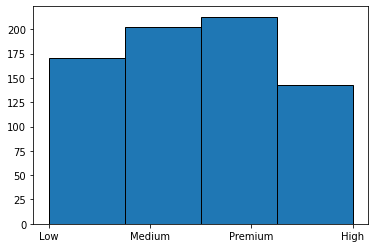

In [101]:
data["priceSegment"].hist(edgecolor='black',  
                          grid=False, bins=4)

We have enough samples for each segment. Data is not balance perfectly but have significant records in all category & will not impact the final model

## 3.8 Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)


In [106]:
##---------Type the code below this line------------------##
data.columns

Index(['deviceName', 'brand', 'screenSize', 'netflixSupport', 'hotstarSupport',
       'youtubeSupport', 'primeVideoSupport', 'operatingSystem', 'screenType',
       'resolution', 'pixels', 'speaker', 'refreshRate(Hz)', 'hdmi', 'usb',
       'warranty', 'price', 'priceSegment'],
      dtype='object')

In [108]:
##---------Type the code below this line------------------##

X = data[['brand', 'screenSize', 'netflixSupport', 'hotstarSupport',
       'youtubeSupport', 'primeVideoSupport', 'operatingSystem', 'screenType',
       'resolution', 'pixels', 'speaker', 'refreshRate(Hz)', 'hdmi', 'usb',
       'warranty']]  #Features
y = data[['priceSegment']] #label

deviceName attribute have unique value for each record so it is not applicable to include in the features.

## 3.9 Discretize the target variable or perform one-hot encoding on the target or any other as and if required.


In [209]:
##---------Type the code below this line------------------##

In [109]:
# Ordinal encoding to covert categories to labels
ordinalScalar=OrdinalEncoder()
X=pd.DataFrame(ordinalScalar.fit_transform(X), columns = X.columns)

labelEncoder=LabelEncoder()
y=pd.DataFrame(labelEncoder.fit_transform(y), columns=['priceSegment'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# 4. Data Exploration using various plots

## 4.1 Scatter plot of each attribute with the target.

In [239]:
data.columns

Index(['deviceName', 'brand', 'screenSize', 'netflixSupport', 'hotstarSupport',
       'youtubeSupport', 'primeVideoSupport', 'operatingSystem', 'screenType',
       'resolution', 'pixels', 'speaker', 'refreshRate(Hz)', 'hdmi', 'usb',
       'warranty', 'price', 'priceSegment'],
      dtype='object')

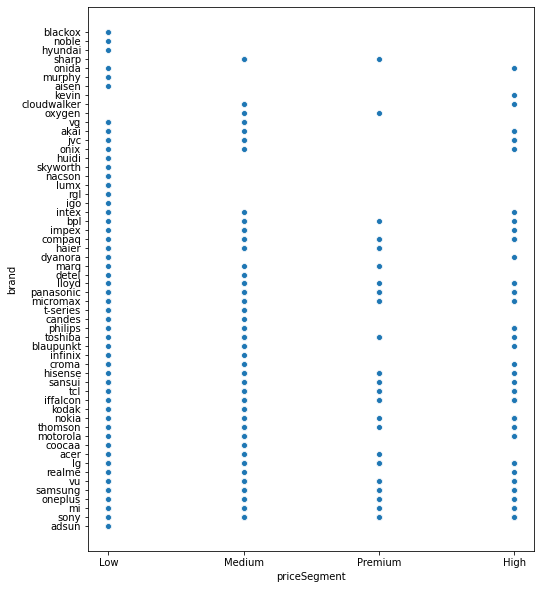

In [256]:
f, ax = plt.subplots(figsize=(8, 10))
sns.scatterplot(x="priceSegment", y="brand", data=data)
plt.show()

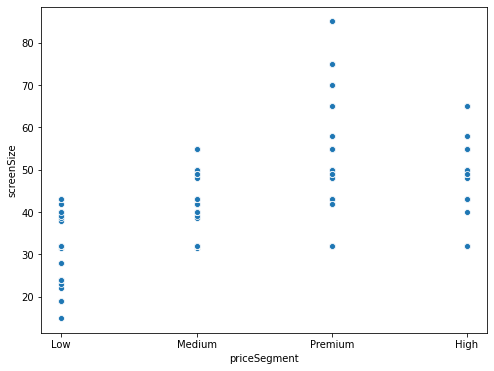

In [254]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="priceSegment", y="screenSize", data=data)
plt.show()

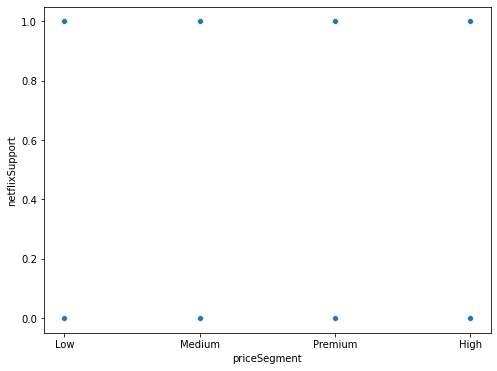

In [253]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="priceSegment", y="netflixSupport", data=data)
plt.show()

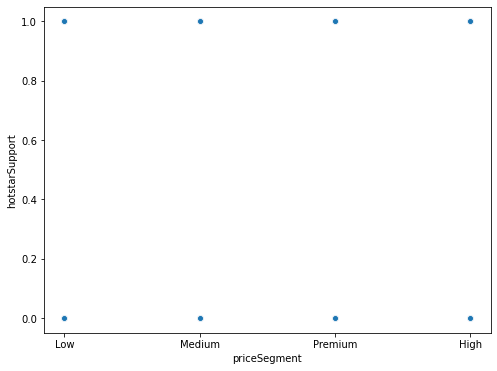

In [252]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="priceSegment", y="hotstarSupport", data=data)
plt.show()

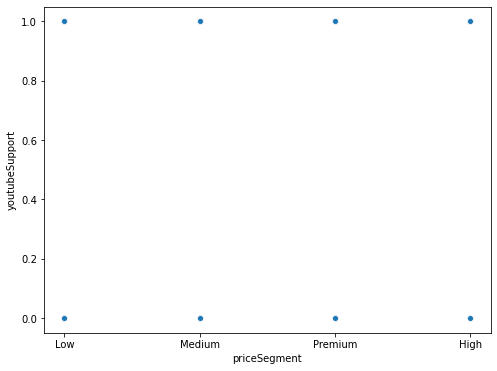

In [251]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="priceSegment", y="youtubeSupport", data=data)
plt.show()

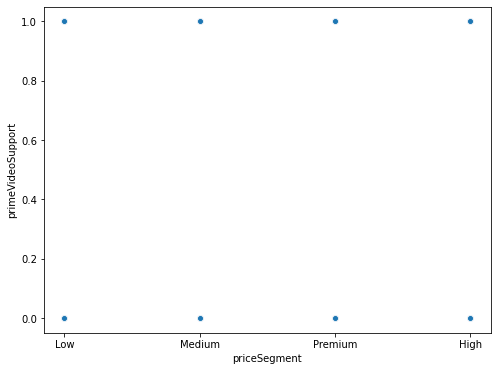

In [250]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="priceSegment", y="primeVideoSupport", data=data)
plt.show()

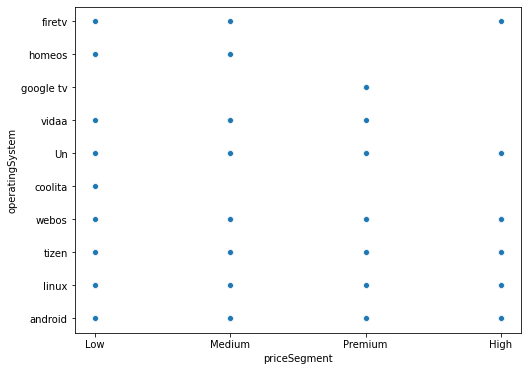

In [249]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="priceSegment", y="operatingSystem", data=data)
plt.show()

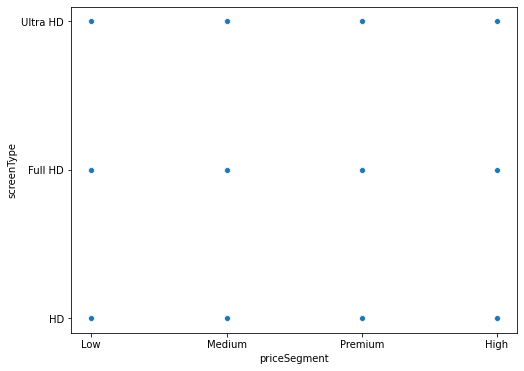

In [248]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="priceSegment", y="screenType", data=data)
plt.show()

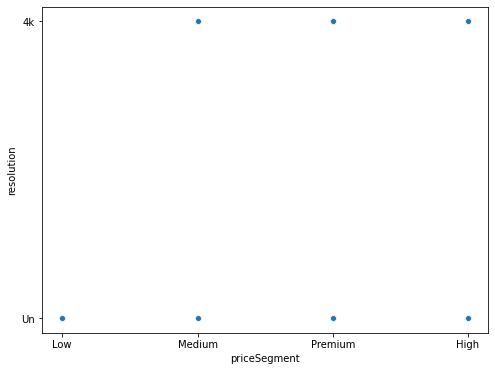

In [247]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="priceSegment", y="resolution", data=data)
plt.show()

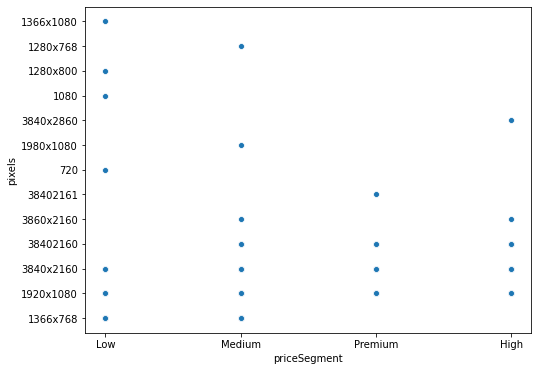

In [246]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="priceSegment", y="pixels", data=data)
plt.show()

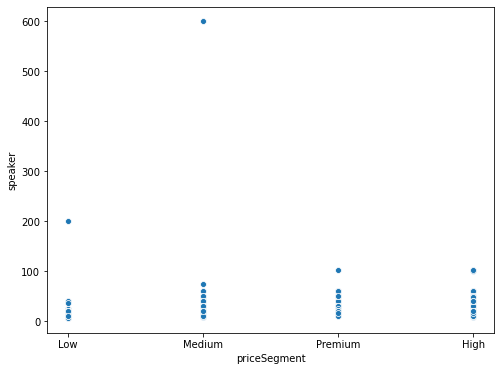

In [244]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="priceSegment", y="speaker", data=data)
plt.show()

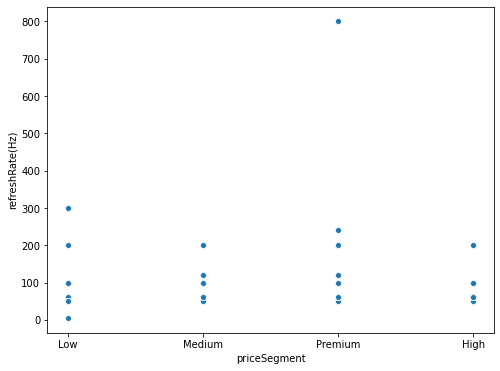

In [243]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="priceSegment", y="refreshRate(Hz)", data=data)
plt.show()

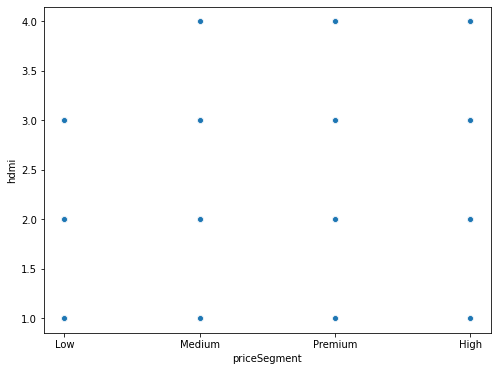

In [242]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="priceSegment", y="hdmi", data=data)
plt.show()

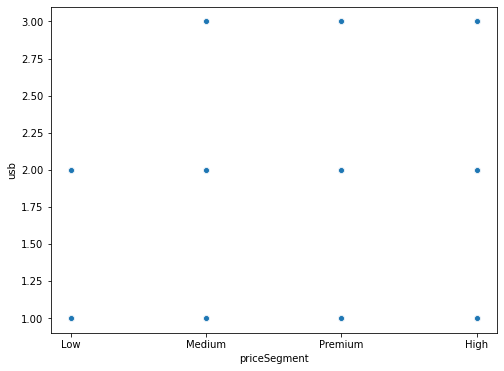

In [241]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="priceSegment", y="usb", data=data)
plt.show()

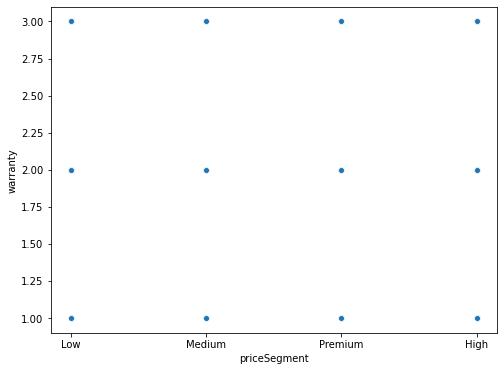

In [240]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="priceSegment", y="warranty", data=data)
plt.show()

## 4.2 Pair plot of each attribute to identify the linear relationships among the attributes.


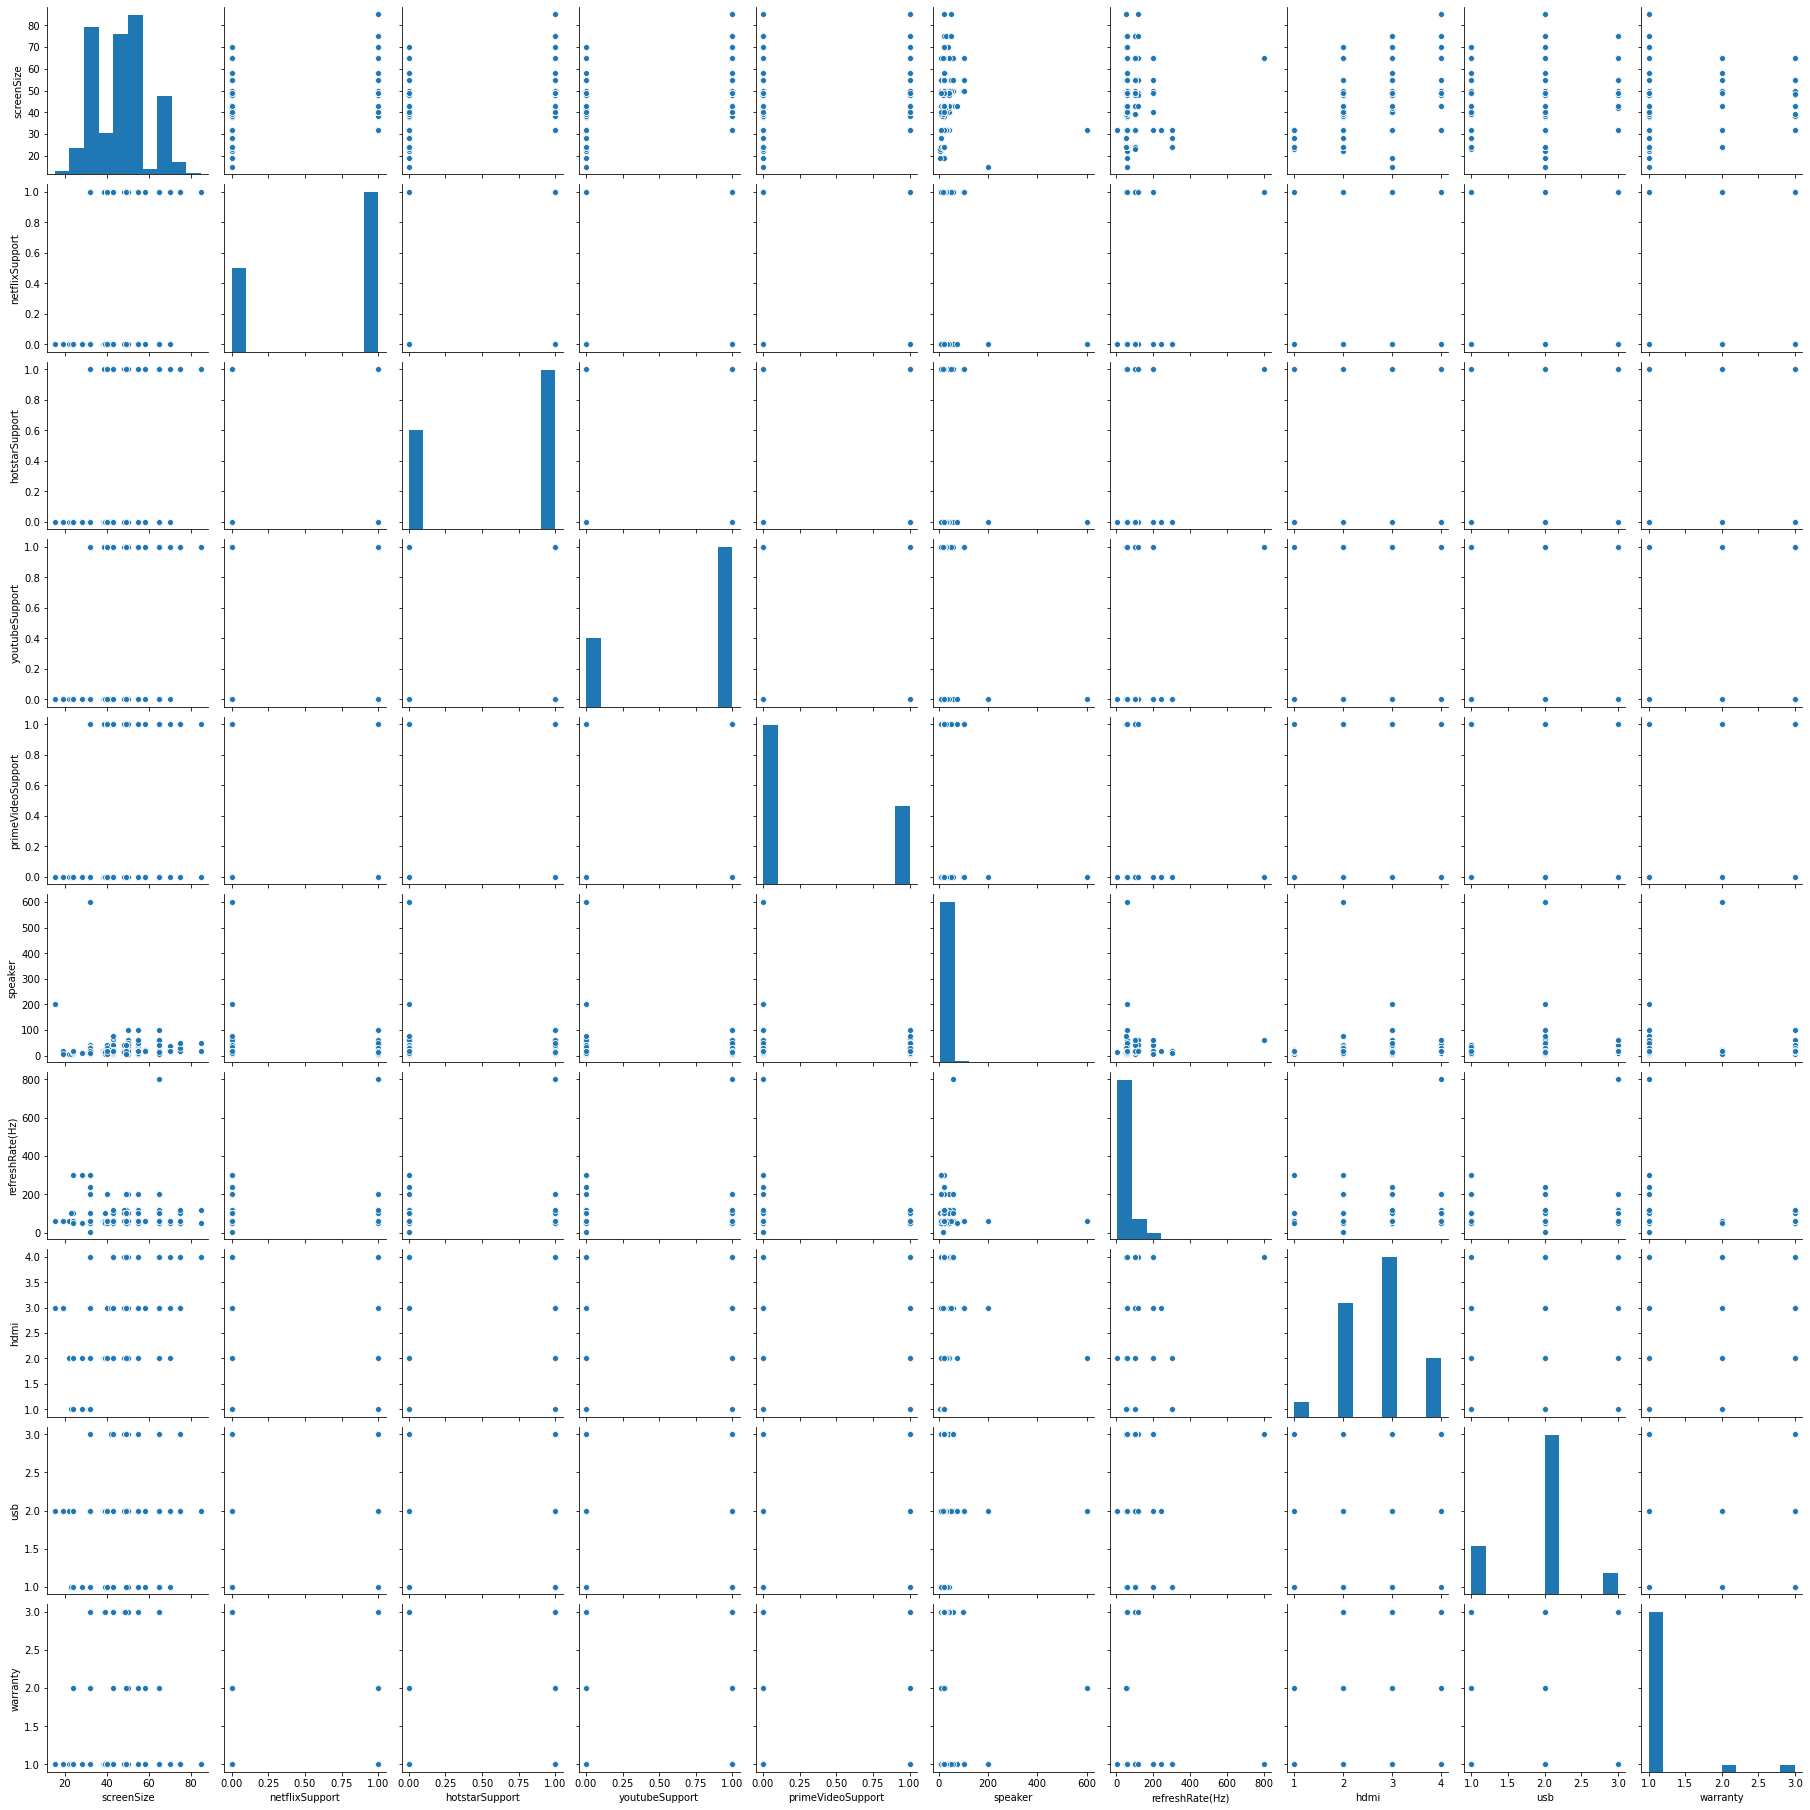

In [259]:
##---------Type the code below this line------------------##
sns.pairplot(data.drop(['deviceName', 'price'], axis=1));

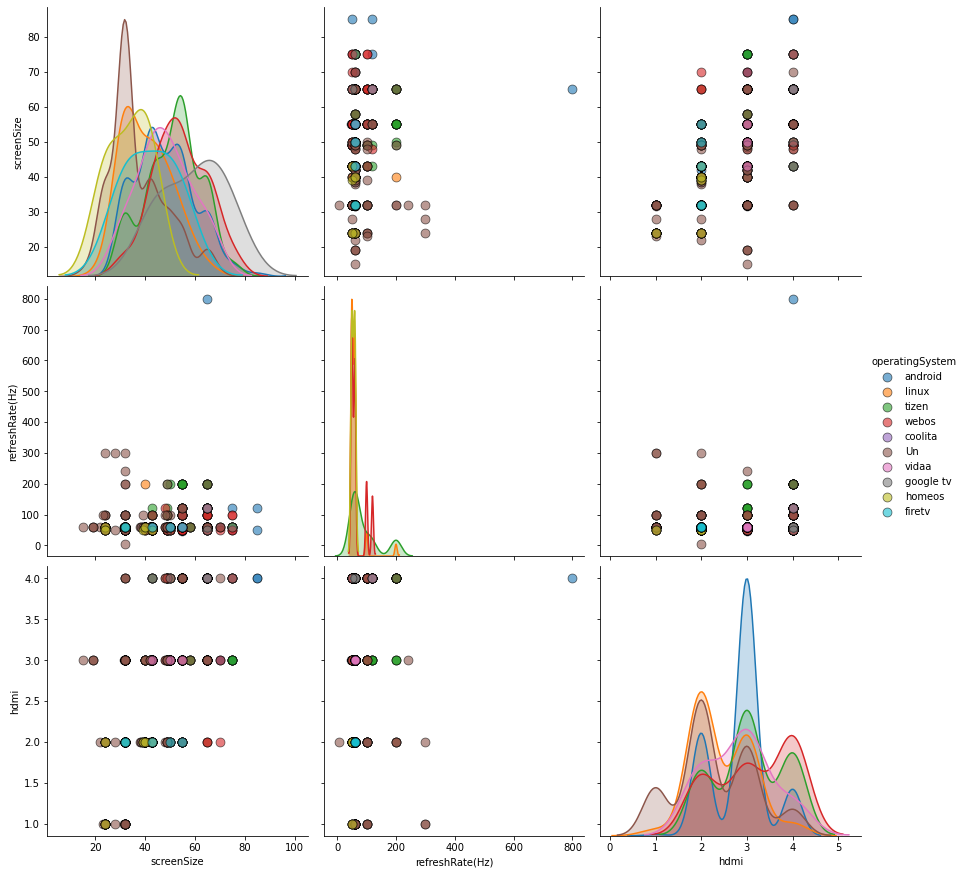

In [270]:
sns.pairplot(data, hue = 'operatingSystem', diag_kind = 'kde', vars = ['screenSize', 'refreshRate(Hz)', 'hdmi'],
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size = 4);

## 4.3 Regression plots to identify the linear relationship between each attribute with the target variable. 


As per our business it is a multi-label classification predictive analysis. The target column are 'low', 'medium', 'high' & 'premium'. Regression will not be applicable here as there is no linear regression relationship that can be established.

we have plotted regression plots for price vs hdmi ports & it is misrepresenting our classification problem.

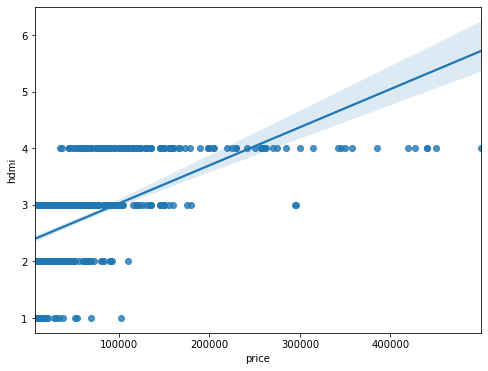

In [272]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="price", y="hdmi", data=data)
plt.show()

Text(0.5, 1.0, 'Histogram of various Attribute')

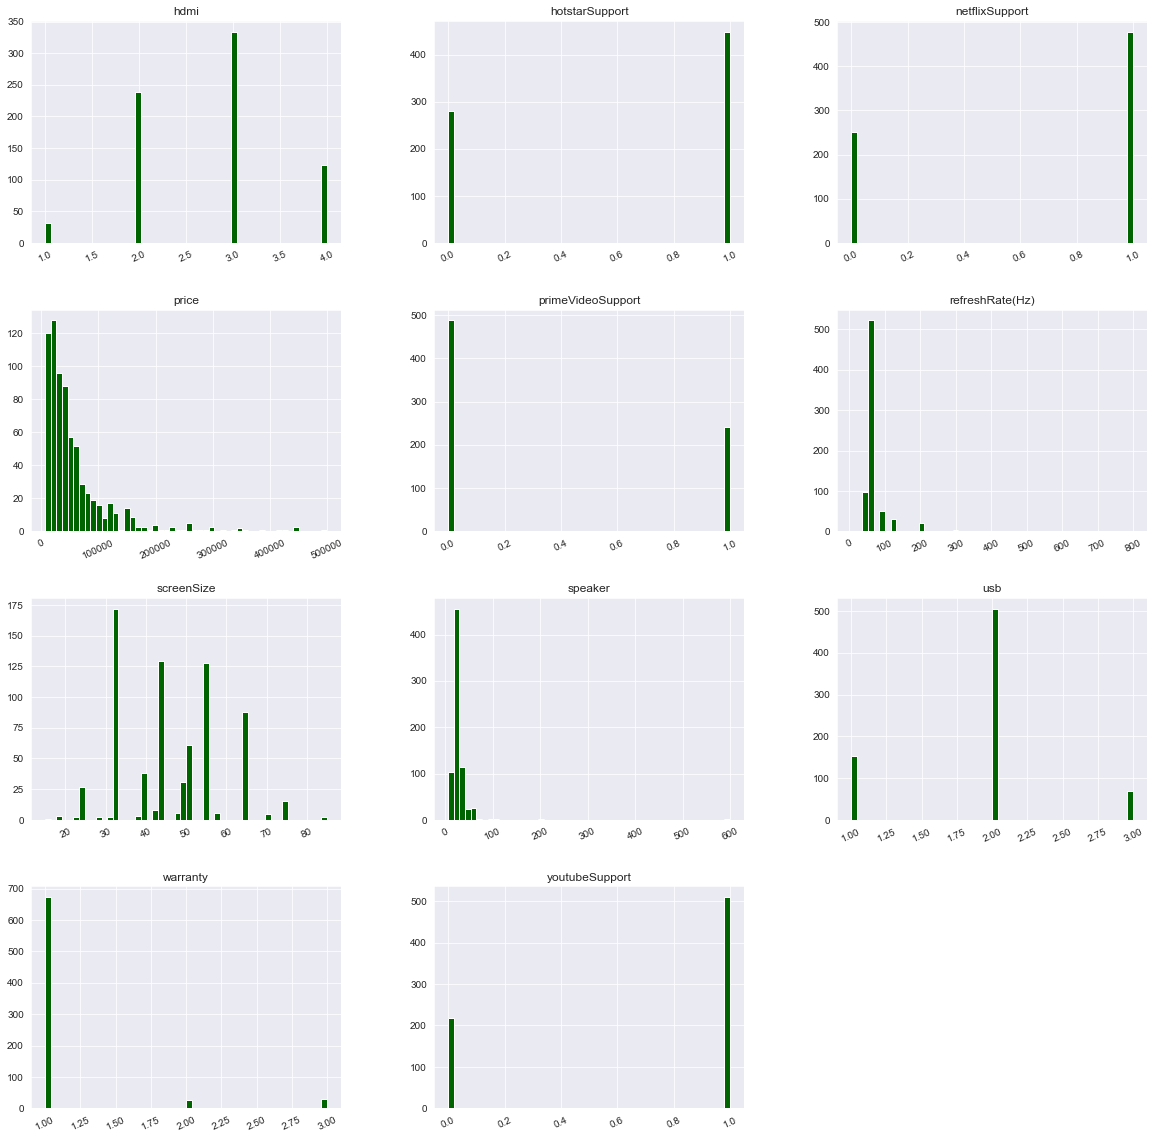

In [307]:
sns.set_style('dark')
data.hist(bins=50,figsize=(20,20),color='darkgreen', xrot=25, xlabelsize=10)
plt.title('Histogram of various Attribute')

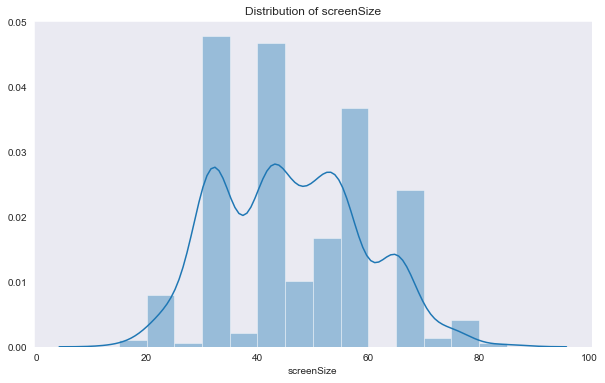

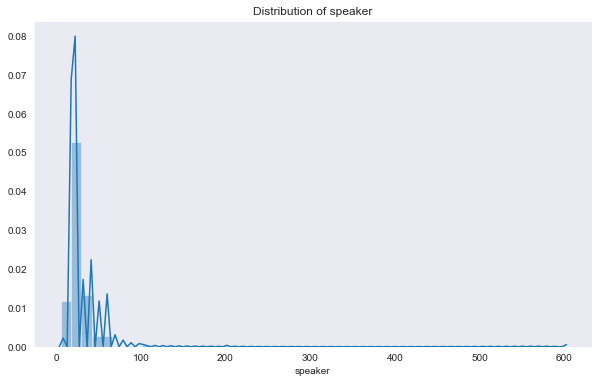

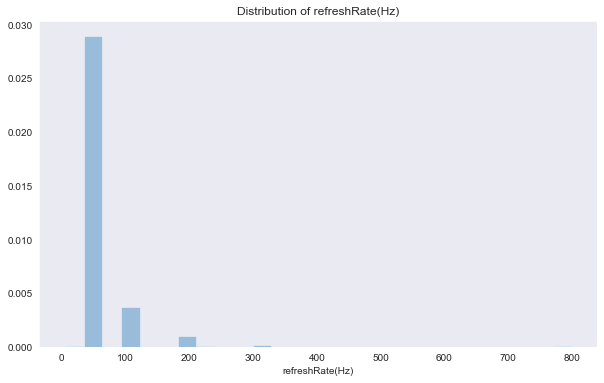

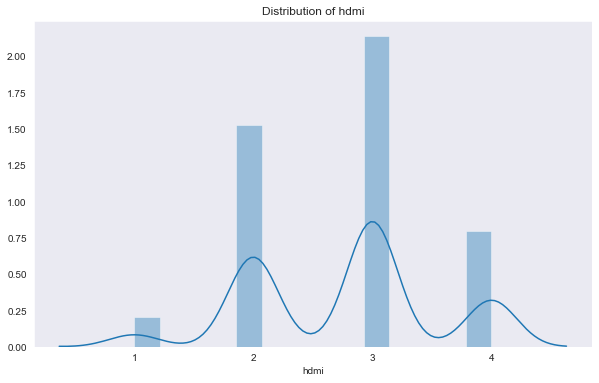

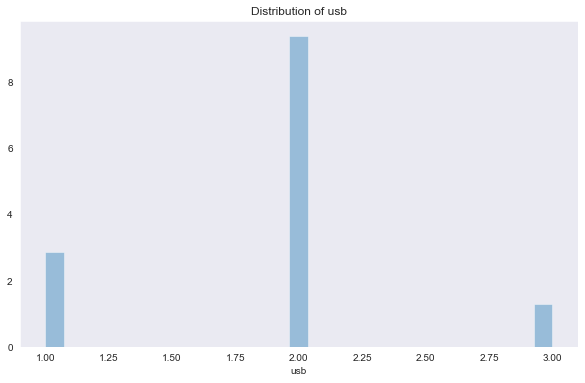

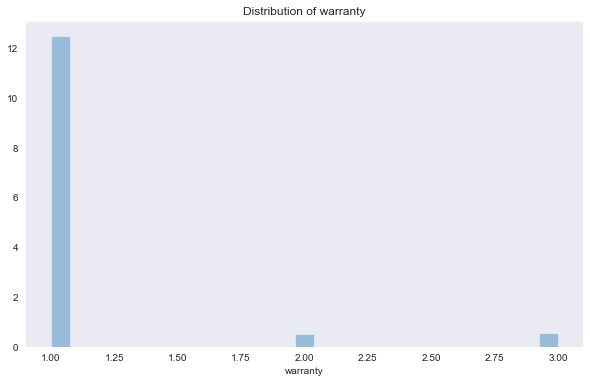

In [310]:
for col in ['screenSize', 'speaker', 'refreshRate(Hz)', 'hdmi', 'usb', 'warranty']:
    fig, ax = plt.subplots(1,1, figsize=(10, 6))
    sns.distplot(data[col])
    plt.title(f'Distribution of {col}')

Let's do count plot to price segment distribution

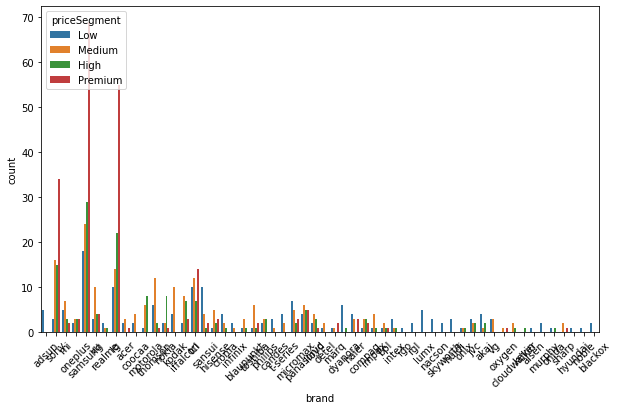

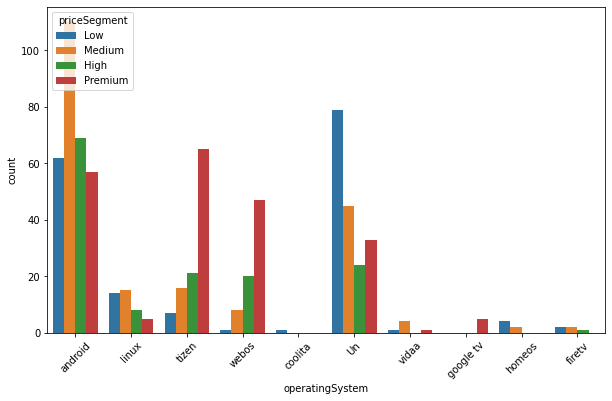

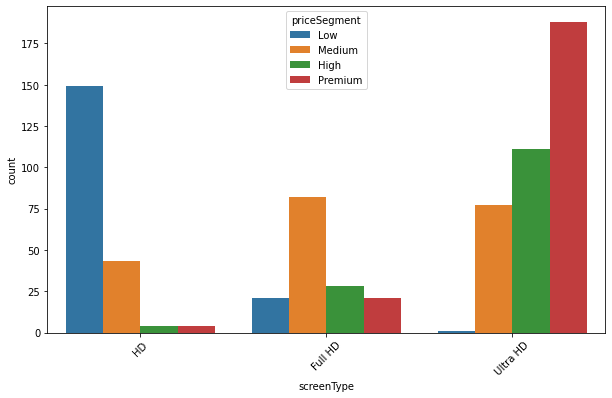

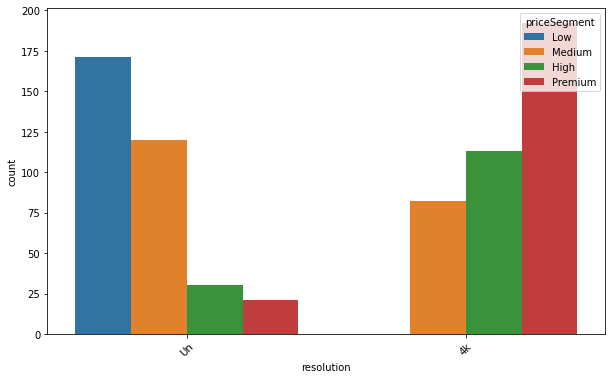

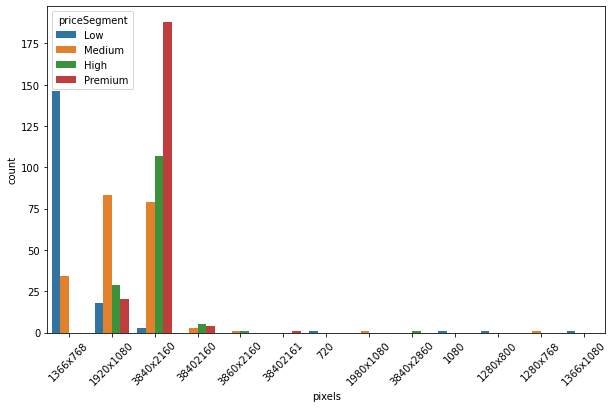

In [306]:
for col in ['brand', 'operatingSystem', 'screenType', 'resolution', 'pixels']:
    fig, ax = plt.subplots(1,1, figsize=(10, 6))
    sns.countplot(x=col, data=data, hue='priceSegment')
    plt.xticks(rotation=45)
#     plt.show()

## 4.4 Can any other plot help to identify the optimal set of attributes that can be used for classification. The plot will be based on linear or nonlinear separations. If there is/are such plots, name them, explain why you think they can be helpful in the task and perform the plot as well.


In [273]:
##---------Type the code below this line------------------##
data.columns

Index(['deviceName', 'brand', 'screenSize', 'netflixSupport', 'hotstarSupport',
       'youtubeSupport', 'primeVideoSupport', 'operatingSystem', 'screenType',
       'resolution', 'pixels', 'speaker', 'refreshRate(Hz)', 'hdmi', 'usb',
       'warranty', 'price', 'priceSegment'],
      dtype='object')

As we have 4 classes of target variable, we have used boxplot to analyze the data spread for each attribute which have numerical values. The analysis show the impact of each attribute on target feature.

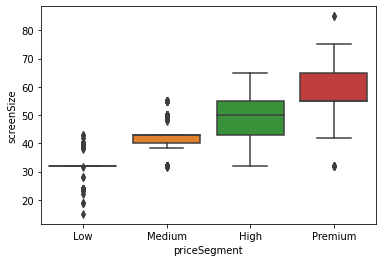

In [293]:
sns.boxplot(x='priceSegment', y='screenSize', data=data)

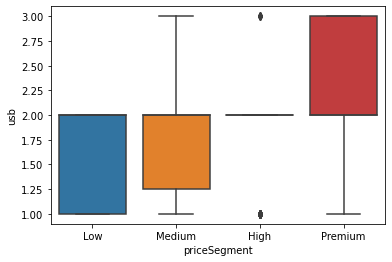

In [291]:
sns.boxplot(x='priceSegment', y='usb', data=data)

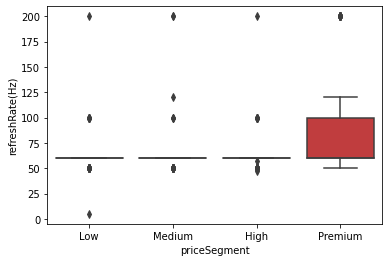

In [288]:
sns.boxplot(x='priceSegment', y='refreshRate(Hz)', data=data[data['refreshRate(Hz)']<=200])

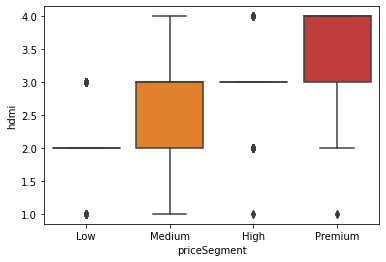

In [280]:
sns.boxplot(x='priceSegment', y='hdmi', data=data)

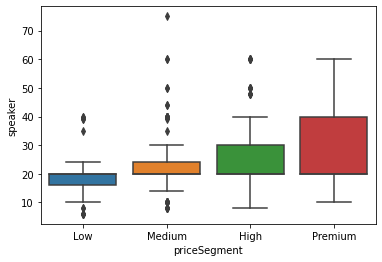

In [282]:
sns.boxplot(x='priceSegment', y='speaker', data=data[data['speaker']<100])

# 5. Data Wrangling



## 5.1 Display correlation heatmap of each attribute against the target and report which features are significant.

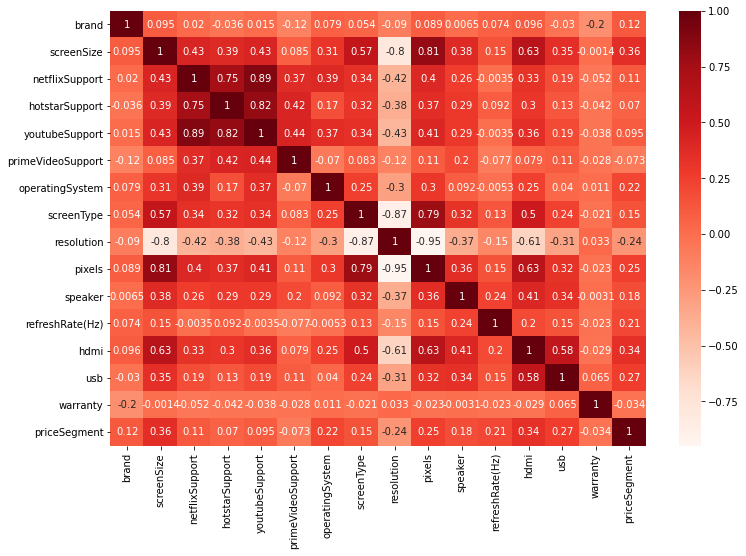

In [110]:
##---------Type the code below this line------------------##
X_y=pd.merge(X, y, left_index=True, right_index=True)
corr=X_y.corr()
top_corr_features = corr.index
plt.figure(figsize = (12,8))
sns.heatmap(X_y[top_corr_features].corr(), annot=True, cmap=plt.cm.Reds)

Observation: 
based on the correlation graph, 
1. Attributes like 'screenSize', 'pixels', 'speaker', 'brand', 'hdmi', 'usb', 'refreshRate' are having correlation with target column 'priceSegment'.
2. pixels, screensize, resolutions are having higher correlation with each other.
3. netflixSupport, hotstarSupport, youtubeSupport, primeVideoSupport are also having higher correlation with each other.

## 5.2 Univariate Filters – Identify top 5 significant features by evaluating each feature independently with respect to the target variable by exploring 
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Fisher Score
(From the above 5 you are required to use only any <b>three</b>) 

Write your observations from the results of each method and report the top 5 significant features for each of the above methods. Also plot a graph of significant features for each of them for better visualization.

Feature Selection using univariate approach : Mutual Information (Information Gain)

In [206]:
##---------Type the code below this line------------------##
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
fit = bestfeatures.fit(X,y)
featureScores=pd.DataFrame({'Features':X.columns, 'Score':fit.scores_})
print(f'Top 5 features are based on Mutual Information (Information Gain): \n')
print(featureScores.nlargest(n=5,columns='Score')) 

Top 5 features are based on Mutual Information (Information Gain): 

      Features     Score
1   screenSize  0.552212
9       pixels  0.419406
7   screenType  0.382569
8   resolution  0.326495
12        hdmi  0.271832


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Feature Selection using univariate approach : Chi-Squared test

In [207]:
##---------Type the code below this line------------------##
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
featureScores=pd.DataFrame({'Features':X.columns, 'Score':fit.scores_})
print(f'Top 5 features are based on Chi-Squared test: \n')
print(featureScores.nlargest(n=5,columns='Score')) 

Top 5 features are based on Chi-Squared test: 

          Features       Score
1       screenSize  997.721634
6  operatingSystem  403.369992
9           pixels  307.304222
8       resolution  192.282944
0            brand  143.895950


Feature Selection using univariate approach : Fisher score

In [208]:
from skfeature.function.similarity_based import fisher_score
scores=fisher_score.fisher_score(X.values, y.priceSegment.values, mode='rank')
featureScores=pd.DataFrame({'Features':X.columns, 'Score':scores})
print(f'Top 5 features are based on Fisher score: \n')
print(featureScores.nlargest(n=5,columns='Score')) 

Top 5 features are based on Fisher score: 

           Features  Score
13              usb     14
0             brand     13
8        resolution     12
11  refreshRate(Hz)     11
9            pixels     10


## 5.3 Train a “DecisionTreeClassifier” on the entire data and use the classifier to extract the top 5 significant features. Plot graph of significant features for better visualization.

In [302]:
def create_model(X, y, show_cm=False, show_class_report=False):

    #Split the data into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3)
    
    #Construct decision tree
    model = DecisionTreeClassifier(random_state=100)
    model.fit(X_train, y_train)

    #Use the decision tree for prediction on test data
    y_pred = model.predict(X_test)
    
    print ("Accuracy : ", accuracy_score(y_test,y_pred)*100, "\n") 
    if show_cm:
        print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
    if show_class_report:
        clReport_GB=classification_report(y_test, y_pred)
        print("Classification Report \n: ", clReport_GB)
    return model

In [303]:
##---------Type the code below this line------------------##
model = create_model(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_importances.nlargest(5)

Accuracy :  70.77625570776256 



pixels        0.257657
screenSize    0.221119
brand         0.195492
speaker       0.095434
hdmi          0.059610
dtype: float64

Graph of feature importances for better visualization

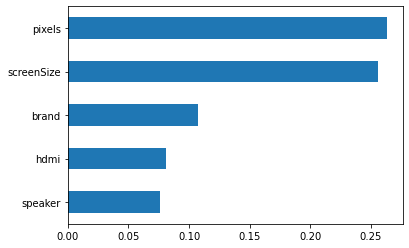

In [188]:
feat_importances.nlargest(5).sort_values(ascending=True).plot(kind='barh')
plt.show()

## 5.4 Using "mlxtend" library perform SequentialFeatureSelector to identify top 5 features.

In [114]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [175]:
##---------Type the code below this line------------------##
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

def getTopkFeaturesMlxtend(X, y, estimator, top_k, forward=True, cv=0):
    
    #Prepare a model using the specified feature selection method 
    sfs = SFS(estimator, k_features=top_k, forward=forward, floating=False, verbose=2,
                   scoring='accuracy', cv=cv)
    
    sfs = sfs.fit(X, y)
    print(f'Score : {sfs.k_score_}')
    print(f'Top {top_k} Feature Names: , {sfs.k_feature_names_}')
    
    return sfs


In [177]:
model = create_model(X, y) 

Accuracy :  70.31963470319634 



In [179]:
getTopkFeaturesMlxtend(X, y, model, 5, forward=True, cv=5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished

[2022-02-21 16:58:13] Features: 1/5 -- score: 0.6459518186112423[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished

[2022-02-21 16:58:13] Features: 2/5 -- score: 0.6816154936230514[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished

[2022-02-21 16:58:13] Features: 3/5 -- score: 0.7076428908833254[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

Score : 0.7104581955597544
Top 5 Feature Names: , ('brand', 'screenSize', 'screenType', 'resolution', 'hdmi')


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished

[2022-02-21 16:58:13] Features: 4/5 -- score: 0.7117902692489371[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2022-02-21 16:58:13] Features: 5/5 -- score: 0.7104581955597544

SequentialFeatureSelector(estimator=DecisionTreeClassifier(random_state=100),
                          k_features=5, scoring='accuracy', verbose=2)

Top 5 attribute based on sequential feature selection method are : 'brand', 'screenSize', 'screenType', 'resolution', 'hdmi'.

## 5.5 Conclude the top 3 significant features with necessary justifications.

--------------Type the answers below this line--------------

Based on the both decision tree classifier & Sequential feature selection using mlxtend, 
top 3 feature to predict price segment of any new television are 
'brand', 'screenSize', 'screenType'.

This make sense as brand is importance factor for price of any TV
2nd parameter which comes is screenSize, as size of screen increases, price increases.
Same is applicable for screen type ('Ultra HD', 'Full HD', 'HD').

Let's rebuild the model with only top 5 features:  'brand', 'screenSize', 'screenType', 'resolution', 'hdmi'.

In [236]:
model = create_model(X[['brand', 'screenSize', 'screenType', 'resolution', 'hdmi']], y, show_cm=True, show_class_report=True) 

Accuracy :  73.51598173515981 

Confusion Matrix : 
 [[30  0 11 16]
 [ 0 48  2  0]
 [ 7  9 35  0]
 [ 7  0  6 48]]
Classification Report 
:                precision    recall  f1-score   support

           0       0.68      0.53      0.59        57
           1       0.84      0.96      0.90        50
           2       0.65      0.69      0.67        51
           3       0.75      0.79      0.77        61

    accuracy                           0.74       219
   macro avg       0.73      0.74      0.73       219
weighted avg       0.73      0.74      0.73       219



There is a increase in accuracy once we consider only top 5 features which justify the impact of feature selection.

In [311]:
#Hyper Parameter Tuning

In [334]:
dt = DecisionTreeClassifier(random_state=100)
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3)
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [335]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=100)

In [332]:
dt_best = grid_search.best_estimator_

In [333]:
y_pred = dt_best.predict(X_test)

print ("Accuracy : ", accuracy_score(y_test,y_pred)*100, "\n") 
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
clReport_GB=classification_report(y_test, y_pred)
print("Classification Report \n: ", clReport_GB)

Accuracy :  68.4931506849315 

Confusion Matrix : 
 [[21  0 19 10]
 [ 0 45  7  0]
 [ 9  8 39  1]
 [13  0  2 45]]
Classification Report 
:                precision    recall  f1-score   support

           0       0.49      0.42      0.45        50
           1       0.85      0.87      0.86        52
           2       0.58      0.68      0.63        57
           3       0.80      0.75      0.78        60

    accuracy                           0.68       219
   macro avg       0.68      0.68      0.68       219
weighted avg       0.68      0.68      0.68       219

